# **Bayesian Inference via Monte Carlo Integration with $\texttt{R}$**

By **Sourish Das**

**Chennai Mathematical Institute**

### **Table of Contents**
1. Introduction and Motivation

2. Inverse Transform Method

3. Acceptance Rejection Method

4. Importance Sampling Method

5. Markov Chain Monte Carlo Method
  - Gibbs Sampler
  - Metropolis-Hastings

6. MCMC Diagnostics

### **Introduction**
    
* Suppose $Y \sim p(y|\theta)$ and $p(\theta)$ is the prior distribution over $\theta$

* Our objective is to make statistical inference about $\theta$

* The **posterior distribution** is:
$$
p(\theta|y)=\frac{p(y|\theta)p(\theta)}{\int_{\Theta}p(y|\theta)p(\theta)d\theta}
$$

* **Posterior mean**: *integration problem*
$$
\mathbb{E}(\theta|y)=\int_{\Theta}\theta p(\theta|y)d\theta =g(y)
$$

* **Posterior median**: *integration problem*
$$
\int_{-\infty}^{\mu_0} p(\theta|y)d\theta =\frac{1}{2},
$$

* **Posterior Mode**: *optimization problem*
\begin{eqnarray*}
\hat{\theta}&=&\text{argmax}_{\Theta}~p(\theta|y)\\
&=&\text{argmax}_{\Theta}p(y|\theta)p(\theta)
\end{eqnarray*}

* **Posterior predictive distribution**:
$$
p(\tilde{y}|y)=\int_{\Theta}p(\tilde{y}|\theta,y)p(\theta|y)d\theta
$$


- In order to get the posterior mean we have to solve this integration
- Analytical solution does not exists for most of the sophisticated models
- So we have to resort to simulation technique to solve this integration problem.
- Typically it is known as **Monte Carlo Integration** method


**Monte Carlo methods** rely on
  - The possibility of generation of endless flow of random variables
  - For well-known or new distributions.
  - Such a simulation is based on the generation of uniform random variables on the interval $(0, 1)$.
  - We are not concerned with the details of producing uniform random numbers.
  - We assume the existence of such a sequence

As we want to estimate the **posterior mean**:
$$
\mathbb{E}(\theta|y)=\int_{\Theta}\theta p(\theta|y)d\theta =g(y)
$$
-  we can do so by simulating random samples from $p(\theta|y)$
-  Suppose $(\theta^1,...,\theta^N)$ are random samples from $p(\theta|y)$, then we can approximate $g(y)$ by
$$
\hat{g}(y)=\frac{1}{N}\sum_{s=1}^N\theta^s
$$
-  If we can ensure simple random sample then Laws of Large Number  ensures
$$
\hat{g}(y)=\frac{1}{N}\sum_{s=1}^N\theta^s \rightarrow g(y)=\mathbb{E}(\theta|y)
$$
as $N \rightarrow \infty$, where $N$ is the simulation size.


**Convergence**:
$$
\bar{h}=\frac{1}{n}\sum_{i=1}^n h(\theta^i)\stackrel{a.s.}{\longrightarrow} \mathbb{E}(h(\theta)|y)=\int_{\Theta}h(\theta)p(\theta|y)d\theta
$$
- **Central Limit Theorem**: 
$$
\frac{\bar{h}-\mathbb{E}(\theta|y)}{\sqrt{\sigma_n^2}}\stackrel{L}{\longrightarrow} N(0,1)
$$
where $\sigma_n^2=\frac{1}{n}\sum_{i=1}^n[\bar{h}-E(\theta|y)]^2$, 
such that $\int_{\Theta}h(\theta)^2p(\theta|y)d\theta< \infty$


The advantage of CLT is we can evaluate the Monte Carlo error
- It assumes $\sigma_n^2$ is the proper estimate of the variance of $\bar{h}_n$
- If $\sigma_n^2$ does not converge, converges too slowly, a CLT may not apply. In such cases we will not be able to estimate the Monte Carlo error.

**Using the $\texttt{R}$ Generator**

- $\texttt{R}$ has a large number of functions that will generate random samples from standard distributions.

- If built-in function in $\texttt{R}$ is available then we can use it directly.

- However, if the built-in functions are not available and the posterior distribution is known upto its kernel then we have to use genric methods to draw samples from such distributions.

**The Inverse Transform**

- The probability integral transform allows us to transform a uniform into any random variable.

- If $X$ has a density $f$ and cdf $F$, then we have the relation 
$$
F(x)=\int_{-\infty}^x f(u)du
$$
we know $F(x) \sim Unif(0,1)$ 

- so we set $U=F(x)$ and solve for $x$

- If $X\sim Exp(1)$ then $F(x)=1-e^{-x}$

- solving for $x$ in $u=1-e^{-x}$ gives $x=-\log(1-u)$


**Generating Exponentially Distributed Random Samples**


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.047, p-value = 0.2193
alternative hypothesis: two-sided


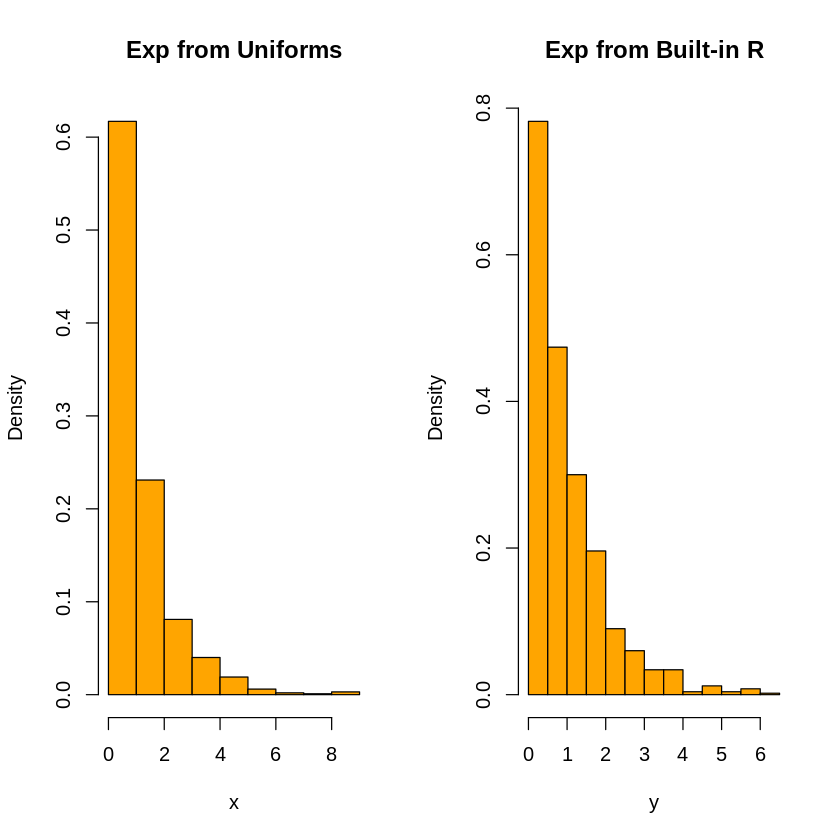

In [ ]:
# Number of random samples
N=1000
# Simulate from uniforms
u=runif(N)
# transforms of uniforms
x= -log(1-u)
# exponential in R
y=rexp(N)
par(mfrow=c(1,2)) # plot parameters
hist(x,freq=F,main="Exp from Uniforms",col="orange")
hist(y,freq=F,main="Exp from Built-in R",col="orange")
ks.test(x,y)

**The Inverse Transform from Uniforms**

This method is useful for other probability distributions ; ones obtained as a transformation of uniform random variables

- **Logistic cdf**: $$F(x)=\frac{1}{1+\exp\left(-\frac{x-\mu}{\lambda}\right)}$$

- **Cauchy cdf**: $$F(x)=\frac{1}{2}+\frac{1}{\pi}arctan((x-\mu)/\sigma)$$

**General Transform Method**

If $X_i \stackrel{iid}{\sim} Exp(1)$; three standard distribution can be derived as

- $Y= 2\sum_{i=1}^n X_i \sim \chi_{2n}^2$

- $Y= \beta \sum_{i=1}^n X_i \sim Gamma(n,\beta)$

- $Y= \frac{\sum_{i=1}^{n_1} X_i}{\sum_{i=1}^{n_1+n_2} X_i}  \sim Beta(n_1,n_2)$

where $n \in \mathcal{N}=\{1,2,...\}$

- These transformations are quite simple and we will use them quite often

- However, there is a limit to their usefullness. Only when closed form CDF is available the method is available.

- The method will not work for Gaussian distribution as the CDF is not in closed form.


**Box-Muller transform**

- Box-Muller transform to generate from Normal distribution

- If $U_1$ and $U_2$ are iid from $Unif(0,1)$

- The variable $X_1$ and $X_2$ 
$$
X_1=\sqrt{-2\log(U_1)}\cos(2\pi U_2),~~~\text{and}~~~ X_2=\sqrt{-2\log(U_1)}\sin(2\pi U_2)
$$
are iid $N(0,1)$ by virtue of a change of variable argument.

- The Box-Muller algorithm is exact, not a crude CLT-based approximation

- Note that this is not the generator implemented in R. It uses the probability inverse transform with a very accurate representation of the Gaussian cdf

In [ ]:
u1 = runif(N)
u2 = runif(N)
# Box-Muller transformation
x1 = sqrt(-2*log(u1))*cos(2*pi*u2)

# built-in function in R
y = rnorm(N)

ks.test(x1,y)


	Two-sample Kolmogorov-Smirnov test

data:  x1 and y
D = 0.056, p-value = 0.08691
alternative hypothesis: two-sided


### Accept-Reject Method

- There are many distributions where transform methods fail

- For these cases, we must turn to indirect methods

- We generate a candidate random variable

- Only accept it subject to passing a test

- This class of 'Accept-Reject' methods is extremely powerful. It will allow us to simulate from virtually any distribution.

**Accept-Reject Methods**:

-  Only require the functional form of the density $f$ of interest

- $f$: **target density**, from where we want to simulate; but we don't know how !!!

- $g$: **candidate density**; where it is simpler to simulate random variables from $g$

- The only constraints we impose on this candidate density $g$

- $f$ and $g$ have compatible supports (i.e., $g(x) > 0$ when $f(x) > 0$).

- $X \sim f$ can be simulated as follows:

- Generate $Y \sim g$ and independently generate $U \sim unif(0,1)$

- If $U\leq \frac{1}{M}\frac{f(Y)}{g(Y)}$ set $X=Y$

- If inequality is not satisfied then discard $Y$ and $U$ and start again.

- Note $M=\sup_x \frac{f(x)}{g(x)}$

- $\mathbb{P}(\text{Accept})=\frac{1}{M}$ and expected waiting time $M$.



### **Why does this method work?**

A straightforward probability calculation shows
$$
P(Y \leq x| \text{Accept})=P\left(Y \leq x| U \leq \frac{f(Y)}{Mg(Y)}\right)= P(X \leq x),
$$
where $Y \sim g$ and $X \sim f$.

- Simulating from $g$, the output of this algorithm is exactly distributed from $f$.

- The **Accept-Reject** method is applicable in any dimension.

- As long as $g$ is a density over the same space as $f$.

- Only need to know $f/g$ upto a constant

- Only need an upper bound on $M$

**Accept-Rejection Algorithm for Beta Distribution**

- Generate $X \sim Beta(a,b)$

- No direct method available if $a$ and $b$ are not integers

- Generate for $a=2.3$ and $b=7.9$

- We can generate if $a$ and $b$ is integer

1. **Candidate distribution** $Unif(0,1)$  
2. **Target distribution** $Beta(2.3,7.9)$


Ref : https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html

Acceptance Rate : 


[1] 24.04

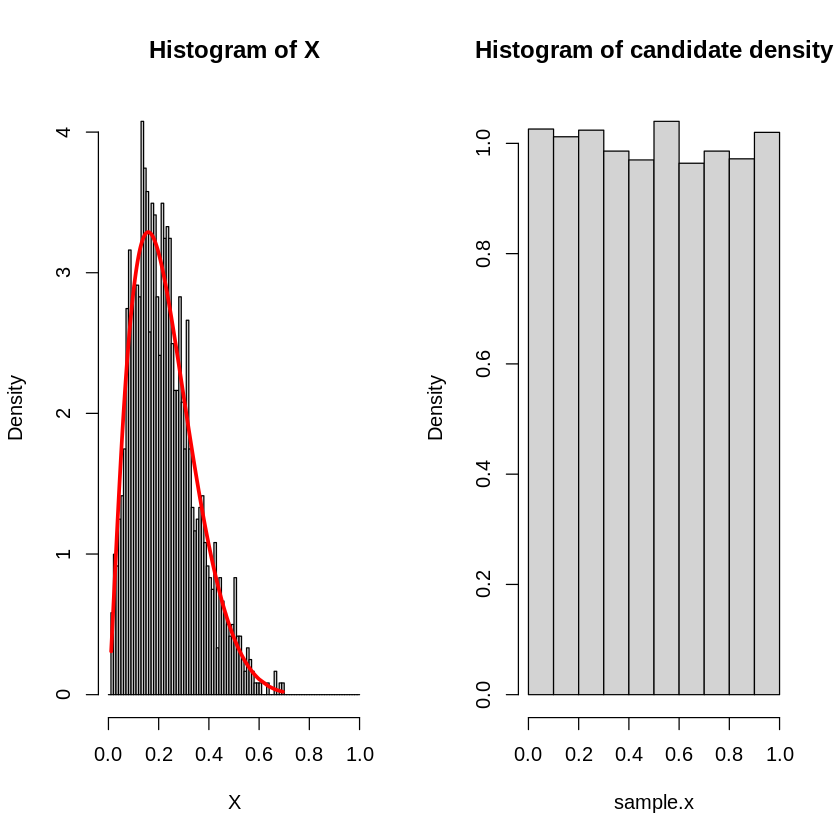

In [ ]:
N=5000
sample.x = runif(N,0,1)
accept = c()

for(i in 1:length(sample.x)){
 U = runif(1, 0, 1)
 if(dunif(sample.x[i], 0, 1)*4*U <= dbeta(sample.x[i], 2.3, 7.9)) {
   accept[i] = 'Yes'
 }
 else if(dunif(sample.x[i],0,1)*4*U > dbeta(sample.x[i], 2.3, 7.9)) {
  accept[i] = 'No'
 }
}

T = data.frame(sample.x, accept = factor(accept, levels= c('Yes','No')))
x = sort(T[,1][T$accept=='Yes'])
par(mfrow=c(1,2))
hist(x, breaks = seq(0,1,0.01), freq = FALSE, main = 'Histogram of X', xlab = 'X')
lines(x, dbeta(x,2.3,7.9),col="red",lwd=3)
hist(sample.x,main= 'Histogram of candidate density',freq=FALSE)

cat("Acceptance Rate :","\n")
(length(x)/length(sample.x))*100


1. **Candidate distribution** $Beta(1,5)$ 
2. **Target distribution** $Beta(2.3,7.9)$

Acceptance Rate : 


[1] 33.22

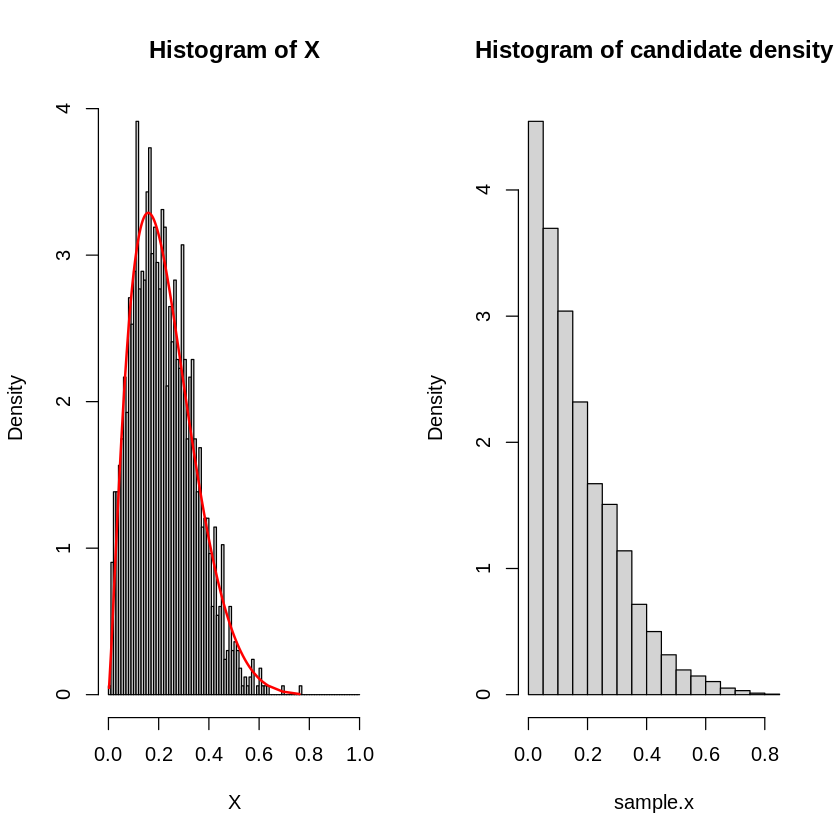

In [ ]:
N = 5000
sample.x = rbeta(N,1,5)
accept = c()

for(i in 1:length(sample.x)){
 U = runif(1, 0, 1)
 if(dbeta(sample.x[i], 1, 5)*3*U <= dbeta(sample.x[i], 2.3, 7.9)) {
   accept[i] = 'Yes'
 }
 else if(dbeta(sample.x[i],1,5)*3*U > dbeta(sample.x[i], 2.3, 7.9)) {
  accept[i] = 'No'
 }
}

T = data.frame(sample.x, accept = factor(accept, levels= c('Yes','No')))
x = sort(T[,1][T$accept=='Yes'])
par(mfrow=c(1,2))
hist(x, breaks = seq(0,1,0.01), freq = FALSE, main = 'Histogram of X', xlab = 'X')
lines(x, dbeta(x,2.3,7.9),col="red",lwd=2)
hist(sample.x,main= 'Histogram of candidate density',freq=FALSE)

cat("Acceptance Rate :","\n")
(length(x)/length(sample.x))*100


1. Candidate distribution $Beta(2,7)$ 
2. Target distribution $Beta(2.3,7.9)$

Acceptance Rate : 


[1] 33.2

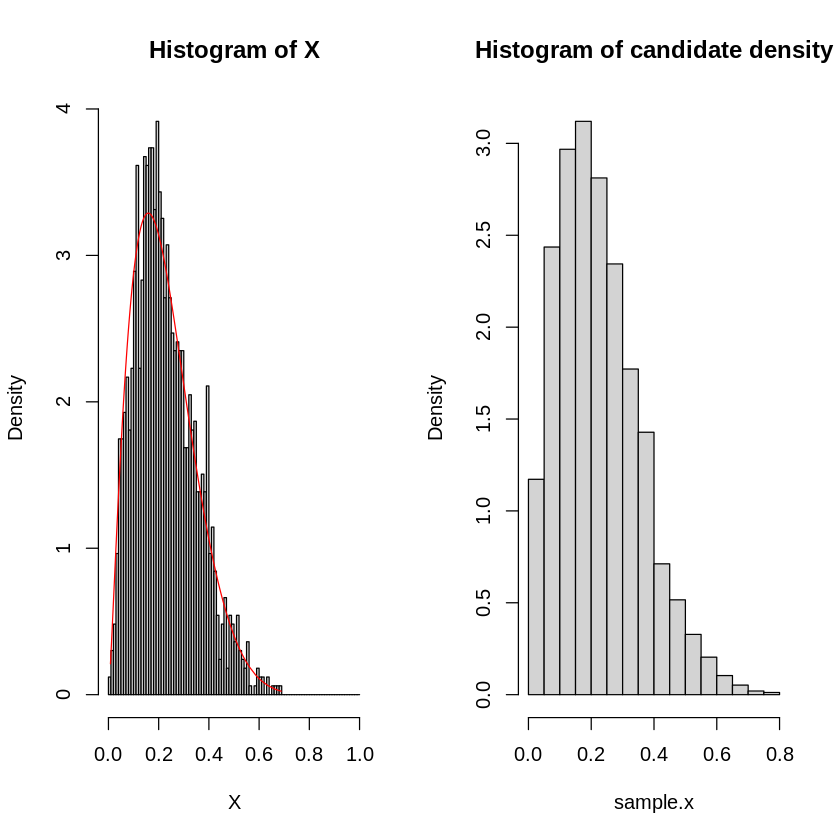

In [ ]:
N = 5000
sample.x = rbeta(N,2,7)
accept = c()

for(i in 1:length(sample.x)){
 U = runif(1, 0, 1)
 if(dbeta(sample.x[i], 2, 7)*3*U <= dbeta(sample.x[i], 2.3, 7.9)) {
   accept[i] = 'Yes'
 }
 else if(dbeta(sample.x[i],2,7)*3*U > dbeta(sample.x[i], 2.3, 7.9)) {
  accept[i] = 'No'
 }
}

T = data.frame(sample.x, accept = factor(accept, levels= c('Yes','No')))
x = sort(T[,1][T$accept=='Yes'])
par(mfrow=c(1,2))
hist(x, breaks = seq(0,1,0.01), freq = FALSE, main = 'Histogram of X', xlab = 'X')
lines(x, dbeta(x,2.3,7.9),col="red")
hist(sample.x,main= 'Histogram of candidate density',freq=FALSE)

cat("Acceptance Rate :","\n")
(length(x)/length(sample.x))*100


## Importance Sampling

Importance sampling is based on an alternative formulation of the SLLN

- For notational convinience we assume $p(\theta|y)=f(\theta)$

\begin{eqnarray*}
E_f(h(\theta))&=&\int_{\Theta}h(\theta)f(\theta)d\theta \\
&=&\int_{\Theta}h(\theta)\frac{f(\theta)}{g(\theta)}g(\theta)d\theta \\ 
&=& E_g\left[\frac{h(\theta)f(\theta)}{g(\theta)}\right]
\end{eqnarray*}

1. $f$ is the target density
2. $g$ is the cadidate density

So in '**Importance Sampling**' all you do is first you generate samples from candidate distribution $g$

- Suppose $(\theta^1,\theta^2,...,\theta^N)$ are the random samples generated from $g$

- You estimates 
$$
\bar{h}=\frac{1}{N}\sum_{i=1}^N\frac{f(\theta^i)}{g(\theta^i)}h(\theta^i)
$$
and by virtue of SLLN we have
$$
\bar{h}=\frac{1}{N}\sum_{i=1}^N\frac{f(\theta^i)}{g(\theta^i)}h(\theta^i) \longrightarrow E_g\left[\frac{h(\theta)f(\theta)}{g(\theta)}\right]=E_f(h(\theta))
$$

The logic underlying importance sampling lies in a simple rearrangement of terms in the target integral and multiplying by 1:
$$\int h(\theta)f(\theta)d\theta=\int h(\theta)\frac{f(\theta)}{g(\theta)}g(\theta)d\theta=\int h(\theta)\omega(\theta)g(\theta)d\theta$$
here $g()$ is another density whose support is same as $f()$.

- $\omega()$ is called importance function

- a good importance function will be large when the integrand is large and small otherwise.

### **Objectives of Importance sampling**

1. It reduces the variance of an integral approximation.

2. Another objective of IS when you cannot generate from the density $p$

3. A third objective of IS is to draw inference or generate sample when the target density is unnormalized 

### **Ex: Importance Sampling to improve integral approximation**

Consider the function $h(x)=10\exp(-2|x-5|)$. Suppose that we want to calculate $E(h(X))$, where $X\sim  Uniform(0,10)$. That is we want to calculate
$$
\int_0^{10} \exp(-2|x-5|)dx.
$$
The true value for this integral is about 1. 

- The simple way to do this is to generate $x_i$ from the $Uniform(0,10)$ and look at the sample mean of $h(x_i)$

- Notice this is equivalent to importance sampling with importance function $\omega(x)=f(x)$, where $f(x)=\frac{1}{10}I(0<x<10)$

- Note that $h(x)=10\exp(-2|x-5|)$ where $x \sim Unif(0,10)$


In [ ]:
set.seed(7831)
sim.size = 50000
X = runif(sim.size,0,10)
Y = 10*exp(-2*abs(X-5))
cat('Estimate = ',round(mean(Y),3),'\n')
cat('Monte Carlo Error = ',round(var(Y),3),'\n')



Estimate =  0.999 
Monte Carlo Error =  3.993 


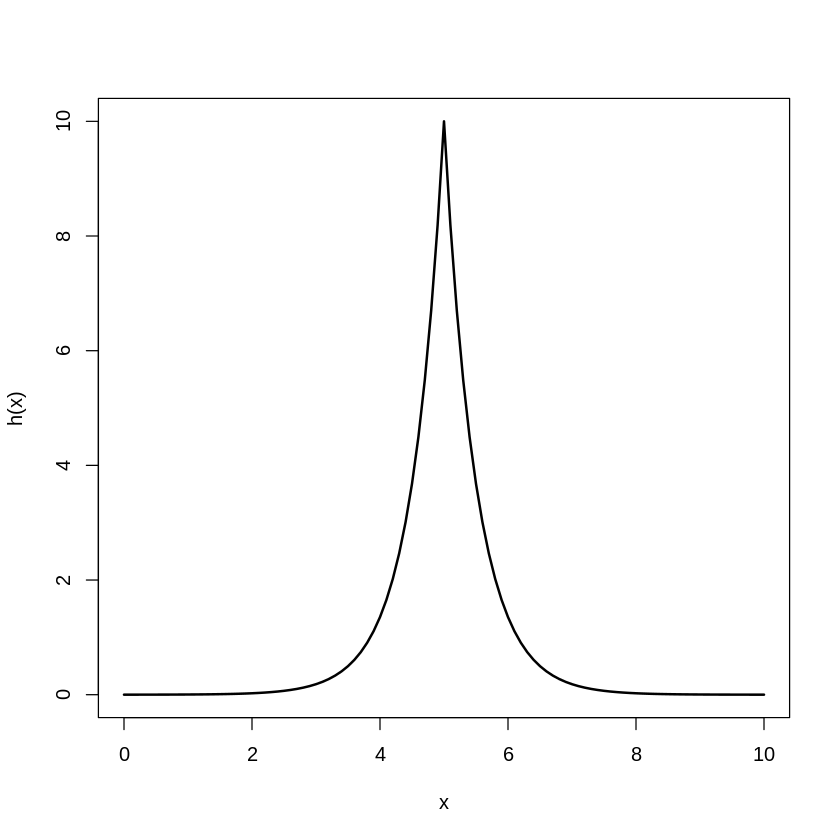

In [ ]:
x = seq(0,10,0.1)
h = 10*exp(-2*abs(x-5))
plot(x,h,ylab="h(x)",type="l",lwd=2)

- Note that $h(x)=10\exp(-2|x-5|)$ where $x \sim Unif(0,10)$

- The function $h()$ in this case is peaked at 5, and decays quickly elsewhere, therefore, under the uniform distribution, many of the points are contributing very little to this expectation.  

- Something more like a gaussian function $ce^{-x^2}$ with a peak at 5 and small variance, say, 1, would provide greater precision

- We can re-write the integral as
$$
\int_{0}^{10}10\exp(-2|x-5|)\frac{1/10}{\frac{1}{\sqrt{2\pi}}e^{-(x-5)^2/2}}\frac{1}{\sqrt{2\pi}}e^{-(x-5)^2/2}dx
$$

- We want to estimate $E[h(X)\omega(X)]$ where $X\sim N(5,1)$

- So in this case $f(x)\sim Uniform(0,10)$, $g(x) \sim N(5,1)$

- The weight function is 
$$
\omega(x)=\frac{\sqrt{2\pi}e^{(x-5)^2/2}}{10}
$$

In [ ]:
w = function(x)dunif(x,0,10)/dnorm(x,mean=5,sd=1)
h = function(x)10*exp(-2*abs(x-5))
set.seed(7831)
sim.size = 50000
x = rnorm(sim.size,mean=5,sd=1)
y = h(x)*w(x)
cat('Estimate = ',round(mean(y),3),'\n')
cat('Monte Carlo Error = ',round(var(y),3),'\n')

Estimate =  1 
Monte Carlo Error =  0.361 


Note that here Monte Carlo variance is much smaller


## **Importance Sampling - Application**

Suppose daily return of a stock is defined as 
$$
r_t=\frac{P_t-P_{t-1}}{P_{t-1}}\times 100
$$
where $P_t$ is the price of the stock on $t^{th}$ day. Suppose it is believed that return of the stock follows $r_t \sim N(0,1)$.

- **Objective**: We want to estimate $P(r_t<-5)$, i.e., we want to estimate the probability that the price of the stock will drop more than $5\%$ in one day?

As we are interested in $P(r_t<-5)$ where $r_t\sim N(0,1)$, the probability in log-scales, i.e., $\ln(P(r_t<-5))$


In [ ]:
log(pnorm(-5,mean=0,sd=1))

[1] -15.065

- Simulating $Z^{(i)}$ from $N(0,1)$ only produces a hit once in about 3 million iterations !

- This is a very **rare event** for standard normal distribution

- Estimates from Importance sampling

In [ ]:
set.seed(5472)
a = -5
x = rnorm(10000,mean=a,sd=2)
y = rep(0,length(x))
y[x<a] = 1
#print(length(y))
g = dnorm(x,mean=a,sd=2)
f = dnorm(x)
w = f/g
print(log(mean(w*y)))


[1] -15.0732


In [ ]:
result = data.frame(matrix(NA,nrow=5,ncol=3))
colnames(result) = c('Target','Built-in R','Importance Sampling')
result[1,1] = 'ln(P(r < -1)'
result[1,2] = -1.841
result[1,3] = -1.865

result[2,1] = 'ln(P(r < -2)'
result[2,2] = -3.783 
result[2,3] = -3.803

result[3,1] = 'ln(P(r < -3)'
result[3,2] = -6.608
result[3,3] = -6.624

result[4,1] = 'ln(P(r < -4)'
result[4,2] = -10.360
result[4,3] = -10.372

result[5,1] = 'ln(P(r < -5)'
result[5,2] = -15.065 
result[5,3] = -15.073

result

Target,Built-in R,Importance Sampling
<chr>,<dbl>,<dbl>
ln(P(r < -1),-1.841,-1.865
ln(P(r < -2),-3.783,-3.803
ln(P(r < -3),-6.608,-6.624
ln(P(r < -4),-10.360,-10.372
ln(P(r < -5),-15.065,-15.073


## **Importance Sampling for  Bayesian Inference**

In Bayesian inference is the primary example where you want to determine the properties of a probability distribution given upto its kernel function.

- Suppose $k(\theta)$ is the kernel function of the posterior distribution $p(\theta|y)$, i.e., $$f(\theta)=p(\theta|y)=\frac{k(\theta)}{C},$$ where $C=\int k(\theta)d\theta=\int p(y|\theta)p(\theta)d\theta$

- Typically we do not know $C$ and we know the posterior distribution in its unnormalized form, i.e.,
$$
p(\theta|y)\propto p(y|\theta)p(\theta)=k(\theta)
$$

- If you want to calculate $E[h(\theta)]$ where unnormalized density of $f(\theta)$ is $k(\theta)$

- We can rewrite this as
\begin{eqnarray*}
E[h(\theta)]&=&\int h(\theta)\frac{k(\theta)}{C}d\theta=\frac{1}{C}\int h(\theta)\frac{k(\theta)}{g(\theta)}g(\theta)d\theta\\ 
&=& \frac{1}{C}\int h(\theta)\tilde{w}(\theta)g(\theta)d\theta
\end{eqnarray*}
where $\omega(\theta)=\frac{f(\theta)}{g(\theta)}=\frac{1}{C}\frac{k(\theta)}{g(\theta)}=\frac{1}{C}\tilde{\omega}(\theta)$ and $f(\theta)=p(\theta|y)$ is the normalized posterior density

- By LLN if $\theta^1,\theta^2,...,\theta^N$ are iid random samples from $g$, then 
$$
\frac{1}{N}\sum_{i=1}^N h(\theta^i)\tilde{\omega}(\theta^i)\longrightarrow C E[h(\theta)]
$$
as $N \longrightarrow \infty$.

- Also by LLN,
$$
\frac{1}{N}\sum_{i=1}^N \tilde{\omega}(\theta^i) \longrightarrow C
$$

- Therefore Monte Carlo estimator for $E[h(\theta)]$ using Importance Sampling Scheme is 
$$
\bar{h}_{IS}=\frac{\sum_{i=1}^N h(\theta^i)\tilde{\omega}(\theta^i)}{\sum_{i=1}^N\tilde{\omega}(\theta^i)}
$$

- The method is only reliable when the weights are not too variable.

- As a rule of thumb, when
$$
V=\sqrt{\frac{1}{N}\sum_{i=1}^N\left(\frac{\tilde{\omega}(\theta^i)}{\bar{\omega}}-1\right)^2}
$$
is less than 5, the IS method is reasonable. Note that $\bar{\omega}=\frac{1}{N}\sum_{i=1}^N \tilde{\omega}(\theta^i)$

- You will know you chose a bad $g$ when $V$ is large.

When $V<5$ the variance $\bar{h}_{IS}$ can be estimated as 
$$
\sigma_{IS}^2=\frac{1}{N}\sum_{i=1}^N(\zeta^i-\bar{h}_{IS})^2
$$
where $$\zeta^i=\frac{\tilde{\omega}(\theta^i)h(\theta^i)}{\bar{\omega}}$$

## **Modeling Road Accident**

- Suppose following data presents number of accidents every month for last 12 months in a particular stretch on natitonal highway 34 (NH34)

- $6, 2, 2, 1, 2, 1, 1, 2, 3, 5, 2, 1$

- We define $y_i$ as the number of accident on $i^{th}$ month, i.e., $y_1=6$, $y_2=2$,... $y_{12}=1$.

- We assume $y_i\stackrel{iid}{\sim} \text{Poisson}(\theta)$ and $\theta \sim \text{log-Normal}(\mu=2,\sigma=1)$

- In this problem since a non-conjugate prior is being selected the posterior distribution is known upto normalizing constant.

- Simulating random samples from the unnormalized posterior distribution is difficult

- So we simulate from a candidate distribution and using the importance sampling method we estimate the $\theta$ as

In [ ]:
y = c(6, 2, 2, 1, 2, 1, 1, 2, 3, 5, 2,1)

IS=function(y,C,N){
  ## y : data
  ## C : C is the tuning parameter for the g distribution
  ## N : the number of monte carlo samples
  
  # sample size
  n = length(y)
  
  # log-post
  log.posterior = function(t)sum(dpois(y,t,log=TRUE))+dlnorm(t,2,1,log=TRUE)
  
  # parameters for the trial distribution
  a = C*mean(y); b = C;
  
  # log trial density, g
  log.g = function(t){
      dgamma(t,a,b,log=TRUE)
  } 
  
  # log importance function
  log.w = function(t) log.posterior(t) - log.g(t)
  
  # generate from the trial distribution
  U = rgamma(N, a, b)
  
  # calculate the list of log.w values
  LP = log.w(U)
  
  # factor out the largest value to prevent numerical underflow
  w = max(LP)
  LP = LP - w
  
  # importance sampling estimate
  I = mean( exp(LP)*U )/mean(exp(LP))
  
  # calculate V
  V = mean( ( (exp(LP)/mean(exp(LP))) - 1)^2 )
  
  # calculate s.e. of the IS estimate
  Z = exp(LP)/mean(exp(LP))
  sig.sq = (1/N)*sum( (Z-I)^2 )
  se = sqrt( sig.sq/N )
  # return the 95 percent confidence interval for the estimate
  return(c(I - 1.96*se, I + 1.96*se, V, I))
}
set.seed(5818)


## calculate V, E(theta|X), and var(E(theta|X))
## for a grid of values for c
const = seq(.05, 20, length=500)
A = matrix(0, 500, 2)

for(j in 1:500){
  OUT = IS(y, const[j], 1000)
  V = OUT[3]
  Var = (OUT[2]-OUT[1])/3.92
  A[j,] = c(V, Var)
}

# final Estimate
IS(y, const[which.min(A[,2])], 1000)[4]



[1] 2.737056

**Importance Sampling**

- Note that simulated ($\theta^1,...,\theta^N$) is not from the target density ... it is from the candidate density $g$

- IS is an estimation method

- Later we will see that simulation from target can be done by adding step to IS 


REf : Lecture Notes of Prof Art Owen at: https://statweb.stanford.edu/~owen/mc/Ch-var-is.pdf

## **Markov Chain Monte Carlo**

Ref: http://patricklam.org/teaching/mcmc_print.pdf

- **Markov Chain** a stochastic process in which future states are independent of past states given the present state
- **Monte Carlo** simulation technique
- Up until now, we have done Monte Carlo simulation to find integrals instead of doing it analytically. This process is called **Monte Carlo Integration**.


- Suppose we have a distribution $f(\theta)$ (perhaps a posterior) from which we want to draw samples.

- To derive it analytically, we need to take integrals:
$$
I=\int_{\Theta}h(\theta)f(\theta)d\theta
$$
where $h(\theta)$ is some function of $\theta$ ($h(\theta) = \theta$ for the mean and $h(\theta) = (\theta - E(\theta))^2$ for the variance).


- We can approximate the integrals via Monte Carlo Integration by
simulating $M$ values from $p(\theta)$ and calculating
$$
\hat{I}=\frac{1}{M}\sum_{i=1}^Mh(\theta^i)
$$


- For example, we can compute the expected value of the $Beta(3,4)$
distribution analytically:
$$
E(\theta)=\int_{0}^1 \theta f(\theta)d\theta=\int_{0}^1 \theta \theta^{3-1}(1-\theta)^{4-1}d\theta=\frac{3}{7}=0.4286
$$
or via Monte Carlo methods:


In [ ]:
set.seed(88732)
M <- 50000
beta.sims <- rbeta(M, 3, 4)
sum(beta.sims)/M

[1] 0.4288105

- Our Monte Carlo approximation $\hat{I}$ is a simulation estimator such that
$
\hat{I}\longrightarrow I
$
as 
$
M \longrightarrow \infty
$
- This follows from LLN.


- Let $\theta_1,\theta_2, \cdots$ be a sequence of **independent** and identically distributed random variables, each having a finite mean $\mu =E(\theta_i)$.
- Then with probability 1,
$$
\frac{\theta_1+\theta_2+...\theta_M}{M}\longrightarrow \mu ~~~ as ~~ M \longrightarrow \infty
$$
- In the example, each simulated random sample was independent and distributed from the same $Beta(3,4)$ distribution.
- But what if we cannot generate draws that are **independent**?


### **Fail to Draw Independent Random Samples**

- Suppose we want to draw from our posterior distribution $p(\theta|y)$,
but we cannot draw independent sample from it.
- For example, we often do not know the normalizing constant.
- We may be able to sample draws from $p(\theta|y)$ that are slightly dependent.
- If we can draw slightly dependent samples using a **Markov chain**, then can we solve the integration?


## **What is a Markov Chain?**

- **Definition**: Markov Chain is a stochastic process in which future states are independent of past states given the present state
- **Stochastic process**: a consecutive set of random (not deterministic) quantities defined on some known state space $\Theta$.
- Think of $\Theta$ as our parameter space
- Consecutive implies a time component, indexed by $t$.

- Consider a draw of $\theta^{(t)}$ to be a state at iteration $t$.
- The next draw $\theta^{(t+1)}$ is dependent only on the current draw $\theta^{(t)}$, and not on any past draws.
- **Markov Property**:
$$
p(\theta^{(t+1)}|\theta^{(t)},\theta^{(t-1)},...,\theta^{(1)})=p(\theta^{(t+1)}|\theta^{(t)})
$$


- So our Markov chain is a bunch of draws of $\theta$ that are each dependent on the previous draw. 
- The chain wanders around the parameter space, remembering only where it has been in the last time.
- What are the rules that govern how the chain jumps from one state to another at each time?
- The rule that govern the jump are known as **transition kernel**.

## **Transition Kernel**

- For discrete state space ($k$ possible states): a $k \times k$ matrix of
transition probabilities.
- **Example**: Suppose $k = 3$. The $3 \times 3$ transition matrix \textbf{P} would be
$$
\begin{table}
\begin{tabular}{|c|c|c|}\hline
$p(\theta_1^{(t=1)}|\theta_1^{(t)})$ & $p(\theta_2^{(t=1)}|\theta_1^{(t)})$ & $p(\theta_3^{(t=1)}|\theta_1^{(t)})$ \\ \hline
$p(\theta_1^{(t=1)}|\theta_2^{(t)})$ & $p(\theta_2^{(t=1)}|\theta_2^{(t)})$ & $p(\theta_3^{(t=1)}|\theta_2^{(t)})$ \\ \hline
$p(\theta_1^{(t=1)}|\theta_3^{(t)})$ & $p(\theta_2^{(t=1)}|\theta_3^{(t)})$ & $p(\theta_3^{(t=1)}|\theta_3^{(t)})$ \\ \hline
\end{tabular}
\end{table}
$$
where the subscripts index the 3 possible values that $\theta$ can take.
- The rows sum to one and define a conditional probability mass function, conditional on the current state.
- The columns are the marginal probabilities of being in a certain state in the next time.


1. Define a starting distribution $\Pi^{(0)}$ (a $1 \times k$ vector of probabilities that sum to one).
- At iteration 1, our distribution $\Pi^{(1)}$ (from which $\theta^{(1)}$ is drawn) is
$$
\Pi_{(1 \times k) }^{(1)} = \Pi_{(1 \times k) }^{(0)} \times \textbf{P} 
$$
- At iteration 2, our distribution $\Pi^{(2)}$ (from which $\theta^{(2)}$ is drawn) is
$$
\Pi_{(1 \times k) }^{(2)} = \Pi_{(1 \times k) }^{(1)} \times \textbf{P} 
$$
- At iteration t, our distribution $\Pi^{(t)}$ (from which $\theta^{(t)}$ is drawn) is
$$
\Pi_{(1 \times k) }^{(t)} = \Pi_{(1 \times k) }^{(t-1)} \times \textbf{P}=\Pi_{(1\times k)}^{(0)} \times \textbf{P}^t 
$$


## **Stationarity of Markov Chain**

- Define a stationary distribution $\pi$ to be some distribution $\Pi$ such that $\pi=\pi\textbf{P}$

- Here we blur the distinction between the Markov chain and its transtion matrix $\textbf{P}$.

- **If posterior distribution is proper then the Markov Chain of the MCMC algorithm will typically converge to $p(\theta|y)$ regardless of our starting points.**

- **So if we can devise a Markov chain whose stationary distribution $\Pi$ is our desired posterior distribution $p(\theta|y)$ then we can run this chain to get draws that approximately from $p(\theta|y)$ once the chain has converged.**


## **Fundamental Theorem of Markov Chain**

- If a Markov chain $\textbf{P}$ is $\textit{irreducible}$, $\textit{aperiodic}$ and $\textit{positive recurret}$ then it has an unique stationary distribution $\pi$.  

- This is the unique (normalized such that the entries sum to 1) left eigenvector of $\textbf{P}$ with eigenvalue 1. 


## **Burn-In**

- In light of the Fundamental theorem of MC, we shall refer to an irreducible, aperiodic Markov chain as ergodic.
- So as long as we can simulate an ergodic Markov chain, irrespective of the starting point the chain will converge to target stationary distribution.
- However, the time it takes for the chain to converge may vary; depending on the starting point.
- As a best practice, it is advisable to throw out a certain number
of the first draws, known as the $\textbf{burn-in}$.


## **Markov Chain Monte Carlo Integration**

- Once we have a Markov chain that has converged to the stationary distribution, then the draws in our chain appear to be like draws from $p(\theta|y)$, so it seems like we should be able to use Monte Carlo Integration methods to find quantities of interest.

- $\textbf{One Problem}$: *MC draws are not independent, which we required for Monte Carlo Integration to work (required condition for SLLN to work).*

- The answer is $\textbf{Ergodic Theorem}$


### **Ergodic Theorem**

Let $\theta^{(1)},\theta^{(2)},...,\theta^{(T)}$ be $T$ values from Markov chain that is aperiodic, irreducible and positive recurrent (that is the chain is ergodic) and $\mathbb{E}[g(\theta)] < \infty$
Then with probability 1
$$
\frac{1}{T}\sum_{t=1}^Tg(\theta^{(t)})\longrightarrow \int_{\Theta}g(\theta)\pi(\theta)d\theta
$$
as $T \longrightarrow \infty$ where $\pi$ is the stationary distribution.


1. This is the Markov chain analog to the LLN.
2. But what does it mean for a chain to be aperiodic, irreducible, and positive recurrent?


### **Aperiodicity**

- A Markov chain $P$ is aperiodic if for all $x, y \in \Omega$ we have $gcd\{t : P^t(x, y) > 0\} = 1$.
- If the only length of time for which the chain repeats some cycle of values is the trivial case with cycle length equal to one then the chain is aperiodic.
- Intuitively we can say repeatation is allowed but as long as the chain is not repeating itself in an identical cycle, then the chain is aperiodic


### **Irreducibility**

- A Markov chain is \textit{irreducible} if it is possible go from any state to any other state (not necessarily in one step).
- A Markov chain $\textbf{P}$ is \textit{irreducible} if for all $x, y$, there exists some $t$ such that $P^t(x, y) > 0$.
- We can show if $\textbf{P}$ is \textit{irreducible}, then $\textbf{P}$ is {aperiodic} $\iff$ there exists $t$ such that $P^{t}(x,y)>0$ for all $x,y \in \Omega$.


### **Positive Recurrence**

- A Markov chain is \textit{recurrent} if for any given state $i$ , if the chain starts at $i$, it will eventually return to $i$ with probability $1$.
- A Markov chain is \textit{positive recurrent} if the expected return time
to state \textit{i} is finite; otherwise it is null recurrent.
- So if our Markov chain is aperiodic, irreducible, and positive
recurrent then it is ergodic and the ergodic theorem allows us to do Monte
Carlo Integration by calculating $E[g(\theta)]$ from draws, ignoring the dependence between draws.


### **What is MCMC?**

- **MCMC** is a class of Monte Carlo methods in which we can simulate dependent sample that are approximately from a posterior probability distribution.
- We then take the draws and calculate quantities of interest for the posterior distribution.
- In Bayesian statistics, there are generally two MCMC algorithms that we use: the Gibbs Sampler and the Metropolis-Hastings algorithm.


## **Two MCMC Samplers**

1. Gibbs Sampling
2. Metropolis Hastings Algorithms


### **Gibbs Sampler**

- Suppose we have a joint posterior distribution $p(\theta_1,...,\theta_k| data )$ that we want to sample from.
- We can use the Gibbs sampler to sample from the target distribution
if we know the \textbf{full conditional posterior} distributions for each parameter.
- For each parameter, the \textcolor{red}{full conditional posterior} distribution is the distribution of the parameter conditional on the known information and all the other parameters: $p(\theta_j|\theta_{-j},y)$


### **The Hammersley-Clifford Theorem**
- For two blocks - Suppose we have a joint density $f(x,y)$.  The theorem proves that we can write out the joint density in terms of the conditional densities.$f(x|y)$ and $f(y|x)$
$$
f(x,y)=\frac{f(y|x)}{\int \frac{f(y|x)}{f(x|y)}dy}
$$
- We can write the denominator as
\begin{eqnarray*}
\int \frac{f(y|x)}{f(x|y)}dy &=& \int \frac{\frac{f(x,y)}{f(x)}}{\frac{f(x,y)}{f(y)}}dy\\
&=&\int \frac{f(y)}{f(x)}dy\\
&=&\frac{1}{f(x)}
\end{eqnarray*}


### **Gibbs Sampler Steps**

- Suppose that we are interested in sampling from the posterior
$p(\theta|y)$, where $\theta$ is a vector of three parameters,
$\theta_1$, $\theta_2$, $\theta_3$. 
      
- The steps to a Gibbs Sampler are 
    1. Pick a vector of starting values $\theta^{(0)}$(*Defining a starting distribution$\Pi^{(0)}$ and drawing $\theta^{(0)}$ from it.*) 

    2. Draw a value $\theta_1^{(1)}$ from the full conditional $p(\theta_1|\theta_2^{(0)}, \theta_3^{(0)},y)$. 

    3. Draw a value $\theta_2^{(1)}$ from the full conditional $p(\theta_2|\theta_1^{(1)}, \theta_3^{(0)},y)$. (*Note that we must use the updated value of $\theta_1^{(1)}$.*) 

    4. Draw a value $\theta_3^{(1)}$ from the full conditional $p(\theta_3|\theta_1^{(1)}, \theta_2^{(1)}, y)$. 

- Steps 2-4 are analogous to multiplying $\Pi^{(0)}$ and **P** to get $\Pi^{(1)}$ and then drawing $\theta^{(1)}$ 

    5. Draw $\theta^{(2)}$ using $\theta^{(1)}$ and continually using the most updated. 

    6. Repeat untill you have $M$ draws with each draw being a vector $\theta^{(t)}$.
values. 
    7. Optional burn-in and/or thinning.
     
- 'Gibbs sample' is a Markov chain with a bunch of draws of $\theta$ that are approximately from our posterior. 


### **The Metropolis-Hastings Sampler**

- Suppose we have a posterior $p(\theta|y)$ that we want to sample from, but 
  - the posterior does not look like any known distribution that we know 
  - If the posterior consists of more than 2 parameters then grid
approximations is not possible. 
  - some (or all) of the full conditionals do not follow known distributions. Therefore Gibbs sampling is not possible for those
whose full conditionals are not known. 
- In such cases, we can use the **Metropolis-Hastings** algorithm.

**The Metropolis-Hastings Algorithm** :
1. Choose starting value $\theta^{(0)}$

2. At iteration $t$, draw a candidate $\theta^{*}$ from a proposal distribution $q_t(\theta^{*}|\theta^{t-1}))$.

3. Compute the acceptance ratio
$$
r=\frac{p(\theta^*|y)/q_t(\theta^*|\theta^{(t-1)})}{p(\theta^{(t-1)}|y)/q_t(\theta^{(t-1)}|\theta^{*})}
$$

4. Accept $\theta^{(t)}=\theta^{*}$ if $U<\min(1,r)$ where $U\sim uniform(0,1)$
   
   Otherwise $\theta^{(t)}=\theta^{(t-1)}$

5. Repeat steps 2-4 $M$ times to get $M$ draws from $p(\theta|y)$ with optional burn-in and/or thinning


**Step 1: Choose a starting value $\theta^{(0)}$**

  1. This is similar to draw sample from initial stationary distribution.
  2. Note that $\theta^{(0)}$ must have positive probability.
$$
p(\theta^{(0)}|y)>0
$$

**Step 2: Draw $\theta^{(*)}$ from $q_t(\theta^{*}|\theta^{(t-1)})$**

1. The proposal distribution $q_t(\theta^{*}|\theta^{(t-1)})$ determines where it moves in the next iteration of the Markov chain.
2. The proposal distribution is analogous to transition kernel.
3. The support of proposal density must contain the support of the posterior
4. If a symmetric proposal distribution that is dependent on $\theta^{(t-1)}$, then it is known as **random walk Metropolis sampling**.
5. If the proposal distribution does not depend on $\theta^{(t-1)}$
$$
q_t(\theta^*|\theta^{(t-1)})=q_t(\theta^*)
$$
then it is known as **independent Metropolis-Hasting sampling**.
6. In this case all candidate draws $\theta^{*}$ are drawn from the same distribution, regardless of where the previous draw was.
7. This can be very efficient or very inefficient, depending how close the proposal density with respect to posterior density.
8. Typically, if proposal density has heavier tails than the posterior, then chain will behave nicely


**Step 3: Compute acceptance ratio $r$ .**

1. The acceptance ratios:
$$
r=\frac{p(\theta^*|y)/q_t(\theta^*|\theta^{(t-1)})}{p(\theta^{(t-1)}|y)/q_t(\theta^{(t-1)}|\theta^{*})}
$$
2. In the case where our proposal density is symmetric
$$
r=\frac{p(\theta^{*}|y)}{p(\theta^{(t-1)}|y)}
$$
3. If the candidate sample has higher probability than the current sample, then the candidate is better so we definitely accept it.
4. Otherwise, the candidate is accepted according to the ratio of the probabilities of the candidate and current samples.
5. Since $r$ is a ratio, we only need to know the $p(\theta|y)$ upto a constant.


**Step 4: Decide to whether accept $\theta^{*}$**

1. Accept $\theta^{*}$ as $\theta^{(t)}$ with probability $\min(r,1)$

2. For each $\theta^{*}$, draw a value $u$ from the $Uniform(0,1)$ distribution.

3. If $u \leq r$ accept $\theta^{*}$ as $\theta^{(t)}$. Otherwise $\theta^{(t-1)}=\theta^{(t)}$

4. Candidate sample with higher density than the current samples are always accepted

5. Unlike in rejection sampling, each iteration always produces a sample, either $\theta^{*}$ or $\theta^{(t-1)}$.


### **How MCMC works?**

- In the cartoon below the **red density** is our **target density**, which is **stationary density**. It does not move around. It is static in one place.

- But we know it only upto its kernel. We don't know how to simulate from it.


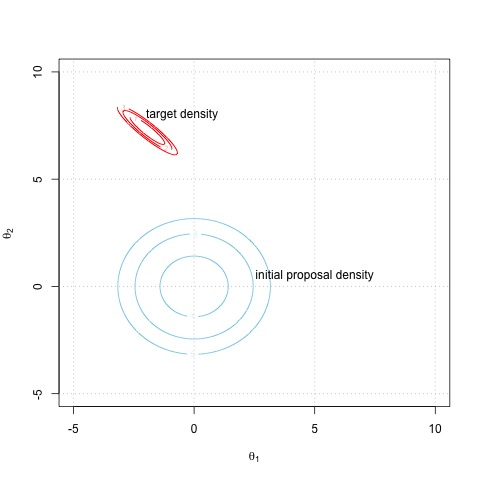

- We choose a simple initial proposal density which maybe far from target density.

- But we know how to simulate from it

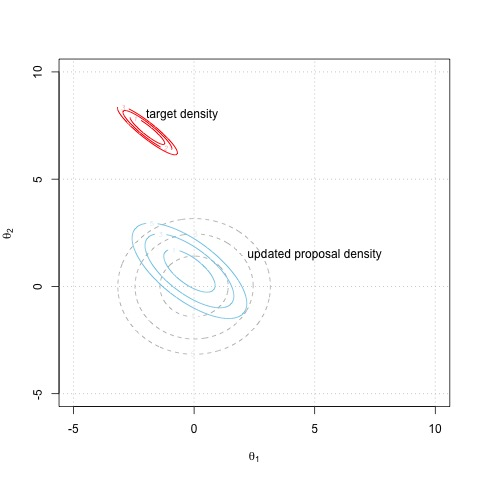

- We simulate from proposal density and accept a value with certain probability

- Once we accept a value; we update our proposal density and simulate from new proposal density

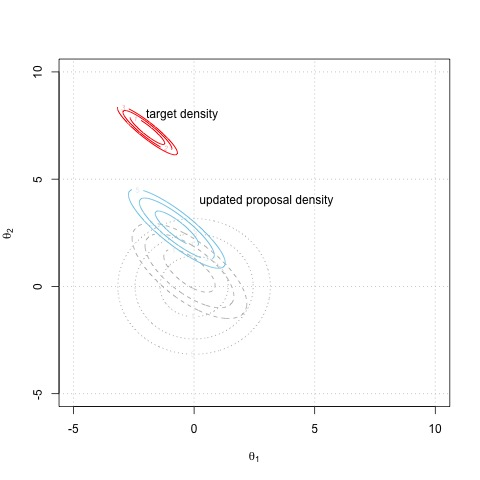

- Since the updation of proposal density was made using the transition kernel density; it creates a **Markov Chain**

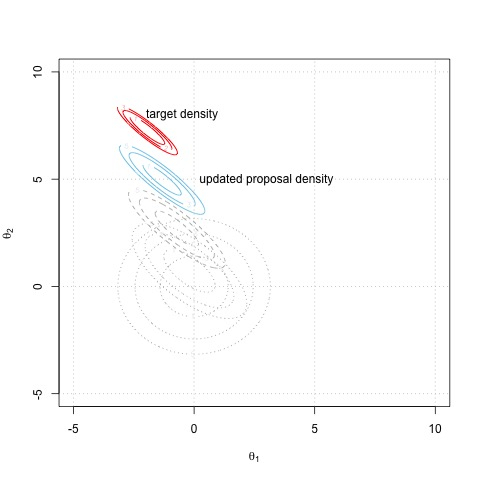

- **Fundamental Theorem of Markov Chain** ensures that the chain converges to its stationary distribution.

**Bayesian CAPM where Idiosyncratic Return follows Laplace Distribution!**

- We want to model the relationship as
$$
r_t^{\text{portf}}=\alpha+\beta~r_t^{\text{S&P 500}} + \epsilon
$$
where 
  - $r_t^{\text{portf}}$ is portfolio return
  - $r_t^{\text{S&P 500}}$ is market index return
  - $\epsilon \sim Laplace(0,\lambda)$

- That is the idiosyncratic Return follows Laplace Distribution

- $$\alpha \sim Cauchy(0,1)$$
- $$\beta \sim Cauchy(0,1)$$
- $$\lambda \sim \text{Half-Cauchy}(0,1)$$

In [ ]:
install.packages('mvtnorm')
library('mvtnorm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

data = read.csv(file='https://www.cmi.ac.in/~sourish/StatFin2016/Program/R_Workshop/stock_treasury.csv')
n = nrow(data)
cat('Sample size = ',n,'\n')

# Risk Free Rate is in percentage and annualised. 
# So the following conversion is required.
Rf = data$UST_Yr_1/(250)

## Compute log-return in percentage
ln_rt_snp500 = diff(log(data$SnP500))*100-Rf[2:n]
ln_rt_ibm = diff(log(data$IBM_AdjClose))*100-Rf[2:n]
ln_rt_apple = diff(log(data$Apple_AdjClose))*100-Rf[2:n]
ln_rt_msft = diff(log(data$MSFT_AdjClose))*100-Rf[2:n]
ln_rt_intel = diff(log(data$Intel_AdjClose))*100-Rf[2:n]

## log-return of the portfolio
ln_r = cbind(ln_rt_ibm,ln_rt_apple,ln_rt_msft,ln_rt_intel)

### Portfolio
w = c(0.2,0.3,0.25,0.25)
ln_rt_portf = ln_r%*%w

Sample size =  250 


**Write log-likelihood function**

In [ ]:
log_likelihood = function(param,y,x){
  a = param[1]
  b = param[2]
  lambda = param[3]
  pred = a + b*x 
  likelihoods = -log(2*lambda)-abs(y-pred)/lambda
  sumll = sum(likelihoods)
  return(sumll)   
}


**Write log-prior function**

In [ ]:
dHalfCauchy = function(theta,log=FALSE){
  if(log==FALSE){
    return(2/(pi*(1+theta^2)))
  }else{
    return(log(2)-log(pi)-log(1+theta^2))
  }
}

log_prior = function(param,x){
  a = param[1]
  b = param[2]
  lambda = param[3]
  a_prior = dcauchy(a,0,1,log = T) 
  b_prior = dcauchy(b,0,1,log = T) 
  scale_prior = dHalfCauchy(theta=lambda,log = T)
  
  return(a_prior+b_prior+scale_prior)
}


**Write log-posterior function**

In [ ]:
log_posterior = function(param,y,x){
  like = log_likelihood(param=param,y=y,x=x)
  prior = log_prior(param=param,x=x)
  post  = like + prior
  return ( post )
}

**Bayesian CAPM Model Fitting with Metropolis-Hastings Algorithm**

- Use conjugate posterior or posterior with flat prior as **proposal function**

In [ ]:
proposalfunction = function(param,x){
  X=cbind(rep(1,length(x)),x)
  S=param[3]*solve(t(X)%*%X)
  prop = c(rmvnorm(1
                  ,mean = param[1:2]
                  ,sigma = S)
          ,rgamma(1,param[3]*5,5))
  return(prop)
}


**Run Metropolis**

In [ ]:
run_metropolis = function(startvalue, N.sim, burnin){
  iterations = N.sim + burnin
  chain = array(dim = c(iterations+1,3))
  chain[1,] = startvalue
  for (i in 1:iterations){
    proposal = proposalfunction(chain[i,],x=x)
    
    probab = exp(log_posterior(param=proposal
                               ,y=y,x=x) 
                 - log_posterior(param=chain[i,]
                                 ,y=y,x=x))
    
    if (runif(1) < probab){
      chain[i+1,] = proposal
    }else{
      chain[i+1,] = chain[i,]
    }
  }
  return(chain)
}


In [ ]:
options(warn=-1)
y=ln_rt_portf
x=ln_rt_snp500
startvalue = c(1,0,1)
N.sim=1000
burnin=0

set.seed(1)
chain = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain)=c("alpha","beta","lambda")
chain=chain[(burnin+1):nrow(chain),]
options(warn=0)

Purposefully we choose starting value far from MLE and keep burn-in at 0; so that we can study the convergence behaviour.

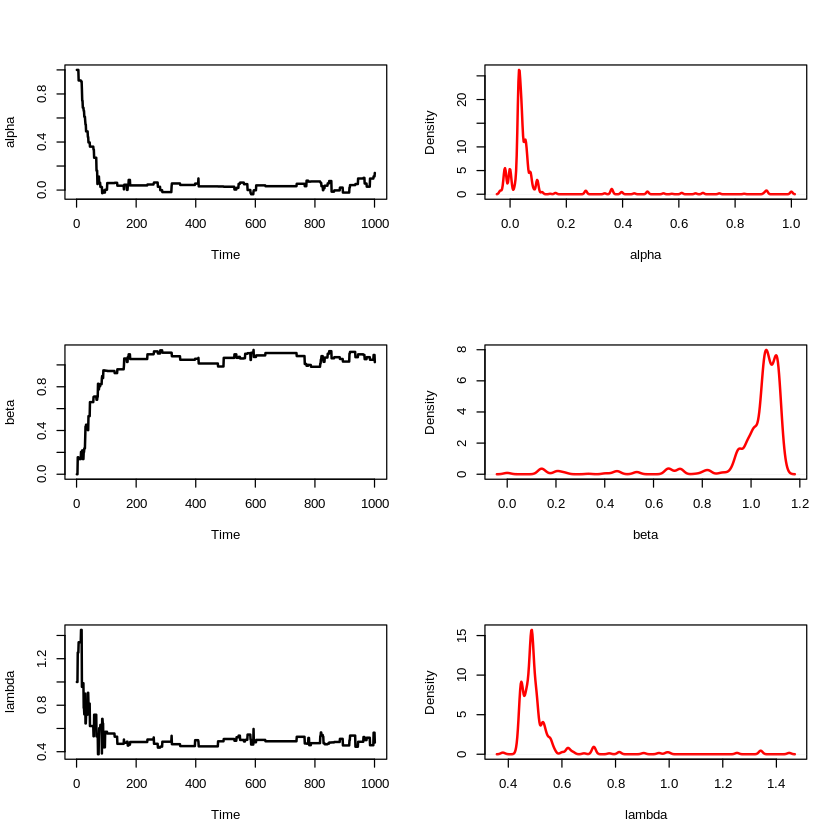

In [ ]:
par(mfrow=c(3,2))
plot(ts(chain[,"alpha"]),lwd=2
     ,ylab = "alpha")
plot(density(chain[,"alpha"]),lwd=2
     ,main = "",col='red'
     ,xlab = "alpha")
plot(ts(chain[,"beta"]),lwd=2
     ,ylab = "beta")
plot(density(chain[,"beta"]),lwd=2
     ,main = "",col='red'
     ,xlab = "beta")
plot(ts(chain[,"lambda"]),lwd=2
     ,ylab = "lambda")
plot(density(chain[,"lambda"]),lwd=2
     ,main = "",col='red'
     ,xlab = "lambda")



**What is the $\mathbb{P}(\alpha >0|y,x)$?**

In [ ]:
alpha_star = chain[,'alpha']
no.of.alpha.gt.zero = length(alpha_star[alpha_star>0])
total.no.of.alpha = length(alpha_star)

prob_a_gt_zero = (no.of.alpha.gt.zero/total.no.of.alpha)

round(prob_a_gt_zero,4)

[1] 0.8811

**If you invest \$100 today in the portfolio, what is the probability that it will be more than \$105 by the end of month? In one month you can consider 22 business-days. You can consider annualised risk-free rate to be 0.5\%.**

In [ ]:
rfr = 0.5/250
days = 22 
count = 0
for(i in 1:N.sim){
  a_str = chain[i,'alpha']
  b_str = chain[i,'beta']
  lambda_str = chain[i,'lambda']
  for(t in 1:days){
    

  }

}

# **6. MCMC Convergence**

## **Geweke Time-Series Disgnostics**

- If we simulate large number of draws after burn-in, then mean (and variance) of a parameter's posterior distribution from first half of the chain will be equal to the mean (and variance) from the second half of the chain.

- The value of this approach is that by allowing the algorithm to run for a very long time, it may reach areas of the posterior distribution that may not otherwise be reached.

- The statistics to test convergence is
$$
z=\frac{\bar{\theta}_a-\bar{\theta}_b}{\sqrt{Var(\theta_a)+Var(\theta_b)}},
$$
where $a$ is the early interval and $b$ is the late interval.

- If the chain has converged, the z-score should be within 2 standard deviation of zero.

- That if $-2<z<2$ then we can say MCMC chain converged.

- If $z<-2$ or $z>2$, then we can say MCMC chain has not converged.

In [ ]:
## Geweke Statistics
alpha_star = chain[1:200,'alpha']
n_str = length(alpha_star)
m_str = floor(n_str/2)
#m_str
alpha_star_1 = alpha_star[1:m_str]
alpha_star_2 = alpha_star[(m_str+1):(n_str)]

z = (mean(alpha_star_1)-mean(alpha_star_2))/sqrt(var(alpha_star_1)+var(alpha_star_2))
cat('Geweke Statistics = ',z,'\n')

Geweke Statistics =  1.048547 


## **Gelman-Rubin Diagnostic**

- Gelman (especially) argues that the best to identify non-converegence is to simulate multiple sequences for over-dispersed starting point

- The intuition is that the behavior of all the chains should be basically same

- or as Gelman and Rubin put it, the variance within the chain should be the same as the variance across the chains.


- The Gelman-Rubin diagnostic uses an analysis of variance approach to assessing convergence. 

- It calculate Between-Chain variance (B) as
$$
B = \frac{m}{m-1}\sum_{j=1}^{m}(\bar{\theta}_{0j}-\bar{\theta}_{00})^2
$$
and within-chain variance (W) as,
$$
W=\frac{1}{m}\sum_{j=1}^{m}\Big[\frac{1}{n-1}\sum_{i=1}^{n}(\theta_{ij}-\bar{\theta}_{0j})^2\Big]
$$
and assesses whether they are different enough to worry about the converegence.

- The marginal posterior variance of $\theta$ is
$$
Var(\theta|Data) = \frac{n-1}{n}W+\frac{1}{n}B
$$

- **Gelman-Rubin Statistics** montor convergence as
$$
R=\sqrt{\frac{Var(\theta|Data)}{W}}
$$

- If converges $R$ would be close to 1

In [ ]:
## Implement with 5 chains

options(warn=-1)
y=ln_rt_portf
x=ln_rt_snp500

N.sim=5500
burnin=500

set.seed(1)
startvalue = c(1,0,1)
chain1 = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain1)=c("alpha","beta","lambda")
chain1=chain1[(burnin+1):nrow(chain1),]

startvalue = c(0,0,1)
chain2 = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain2)=c("alpha","beta","lambda")
chain2=chain2[(burnin+1):nrow(chain2),]

startvalue = c(0,1,0.5)
chain3 = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain3)=c("alpha","beta","lambda")
chain3=chain3[(burnin+1):nrow(chain3),]

startvalue = c(1,0,1)
chain4 = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain4)=c("alpha","beta","lambda")
chain4=chain4[(burnin+1):nrow(chain4),]

startvalue = c(1,0,1)
chain5 = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain5)=c("alpha","beta","lambda")
chain5=chain5[(burnin+1):nrow(chain5),]
options(warn=0)

### **Gelman Rubin Statistics**

In [ ]:
## Gelman-Rubin Statistics for alpha

n_str = length(chain1[(burnin+1):nrow(chain1),'alpha'])
m_str = 5

alpha_star_1 = chain1[(burnin+1):nrow(chain1),'alpha']
alpha_star_2 = chain2[(burnin+1):nrow(chain2),'alpha']
alpha_star_3 = chain3[(burnin+1):nrow(chain3),'alpha']
alpha_star_4 = chain4[(burnin+1):nrow(chain4),'alpha']
alpha_star_5 = chain5[(burnin+1):nrow(chain5),'alpha']

a1 = mean(alpha_star_1)
a2 = mean(alpha_star_2)
a3 = mean(alpha_star_3)
a4 = mean(alpha_star_4)
a5 = mean(alpha_star_5)

ai_bar = c(a1,a2,a3,a4,a5)

a_bar = mean(ai_bar)

B = m_str/(m_str-1)*sum((ai_bar-a_bar)^2)
cat('B = ',B,'\n')

W =(1/m_str)*sum(var(alpha_star_1)+var(alpha_star_2)+var(alpha_star_3)+var(alpha_star_4)+var(alpha_star_5))
cat('W = ',W,'\n')

marginal_var_alpha = ((n_str-1)/n_str)*W+(B/n_str)
cat('marginal posterior variance = ',marginal_var_alpha,'\n')

R_hat = sqrt(marginal_var_alpha/W)
cat('Gelman Rubin Statistic = ',round(R_hat,4),'\n')


B =  2.270146e-05 
W =  0.001166209 
marginal posterior variance =  0.00116598 
Gelman Rubin Statistic =  0.9999 
